
# Dimensionality Reduction - Non-Linear Methods

One of the main goals of dimensionality reduction is to **visualize high-dimensional data in low-dimension**. 

A meaningful low-dimensional visualization would maintain the local structure of the data in high-dimension. For example, data points that are similar in high-dimension should be clusterd in low-dimension as well.

In this notebook we will see that dimensionality reduction techniques such as PCA creates meaningful 2D visualization as long as the high-dimensional data is **linear**. For non-linear data we need more sophiticated methods for visualization in low-dimension.

First we discuss why PCA fails to create good visualization of non-linear high-dimensional data.


## Visualization by PCA on High-Dimensional Data

The linear methods of dimensionality reduction are flexible, fast, and easily interpretable. For example, PCA works well when the data lies in a **linear subspace**. However, this may not hold in many applications when there are **nonlinear relationships** within the data.

For example, PCA does not create good visualization when features of the dataset maintains a non-linear relationship.

Let's illustrate this fact by applying PCA on a non-linear dataset. We use a handwritten digits dataset in which indiviual pixels are the features. The digits are created via a **non-linear combination of the pixels**.

We use the MNIST (Modified National Institute of Standards and Technology) dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents.

There are 70,000 images. Each image is grayscale **28 x 28 pixels**, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

Thus, each image has 784 features. This gives us a **784-dimensional dataset**. We will project this dataset in 2D by using PCA. We will see how well PCA performs this job. For example, we will see whether PCA clusters same digits in 2D.


In [1]:
import time
import numpy as np
import pandas as pd
from scipy.io import loadmat

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import fetch_openml, make_swiss_roll

from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, Isomap, MDS, TSNE

## Load MNIST Data, Create Data Matrix (X) & Target Vector (y)

First load the data and explore the feature names, target names, etc.

We may load the data from a local folder or load it directly from cloud using Scikit-Learn.

In [2]:
np.random.seed(42)

# Load data using Scikit-Learn
# mnist = fetch_openml('mnist_784', cache=False)

# X = mnist["data"].astype('float32')
# y = mnist["target"].astype('int64')


# Load the data from the local folder "data"
mnist = loadmat('/Users/hasan/datasets/MNIST/mnist-original.mat')

# Create the data Matrix X and the target vector y
X = mnist["data"].T.astype('float64')
y = mnist["label"][0].astype('int64')

print("\nNo. of Samples: ", X.shape)
print("No. of Labels: ", y.shape)


No. of Samples:  (70000, 784)
No. of Labels:  (70000,)


## Apply PCA on a Random Subset of the MNIST Dataset

We use a random subset of 5,000 images for projecting it onto 2D via PCA.

In [3]:
m = 5000
idx = np.random.permutation(70000)[:m]

X = X[idx]
y = y[idx]


print("\nReduced No. of Samples: ", X.shape)
print("Reduced No. of Labels: ", y.shape)


Reduced No. of Samples:  (5000, 784)
Reduced No. of Labels:  (5000,)


## Data Saling

Each image of the MNIST dataset is encoded in a 784 dimensional vector, representing a 28 x 28 pixel image. Each pixel has a value between 0 and 255, corresponding to the grey-value of a pixel.

We scale X by dividing it with 255, such that the range of values is between [0, 1], instead of [0, 255].

In [4]:
X /= 255.0

## Apply PCA to Project MNIST Dataset on 2D

In [5]:
# PCA
t0 = time.time()

pca = PCA(n_components=2, random_state=42)
X_pca_reduced = pca.fit_transform(X)

t1 = time.time()

duration_PCA = t1 - t0


# Explained variance for each component
print("Explained variance (first two components): %s"
      % str(pca.explained_variance_))

# Percentage of variance explained for each component
print("\nExplained variance ratio (first two components): %s"
      % str(pca.explained_variance_ratio_))

Explained variance (first two components): [5.13340342 3.73153965]

Explained variance ratio (first two components): [0.09762046 0.07096162]


## Plot the MNIST Dataset using Two Principle Components

We see that the first two components account for about 25% of the variation in the entire dataset. 

Now we want to see if this is enough to **visually set the different digits apart**. 

We create a scatterplot of the first and second principal component and color each of the different types of digits with a different color. 

Our goal is to see whether the same type of digits will be positioned (i.e., clustered) together in groups. 

It would mean that the first two principal components actually tell us a great deal about the specific types of digits.

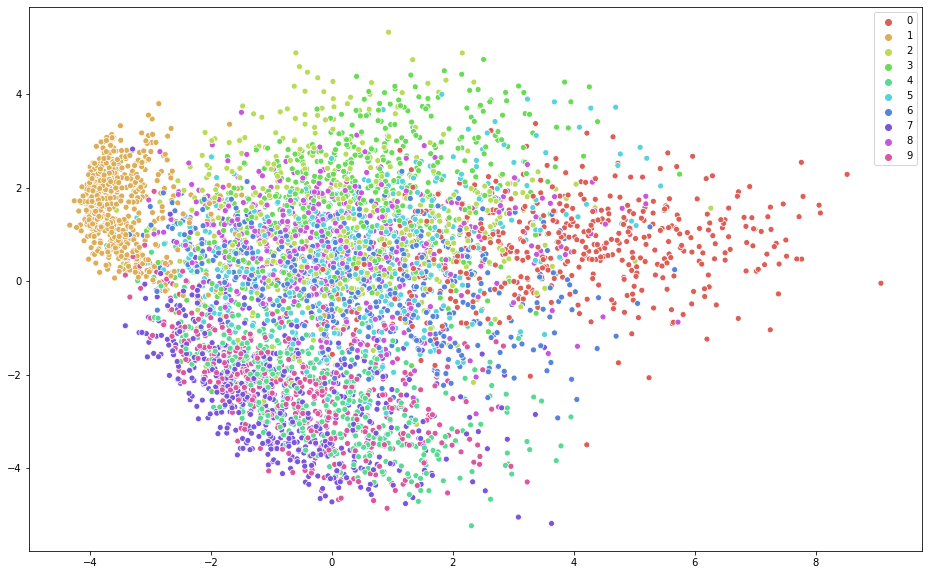

In [6]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=X_pca_reduced[:, 0], y= X_pca_reduced[:, 1],
    hue=y,
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=1.0
)
plt.show()

## Observation from the Colored Plot

From the colored plot we see the existence of two clusters of similar points (same color, i.e., same digits):
- The cluster of 0's (red) 
- The cluster of 1's (orange)

Thus, the main source of variation between the digits is between 0 and 1. This is intuitive as 0's and 1's have very little overlapping pixels.

However, other digits don't form distinct clusters. They are overlapped.

- towards the bottom of the plot we have a mixture of three digits: 9, 7, 4
- towards the top we have a mixture of three digits: 3, 5, 8

These mixtures are due to the resemblance of the pixels of the digits.

Therefore, the two components definitely hold some information, especially for specific digits (0 and 1), but clearly not enough to set all of them apart. 

If we remove the distinct colors from the plot (shown below), it is hard to isolate clusters of similar points. There is significant overlap which results into a large blob of all points.

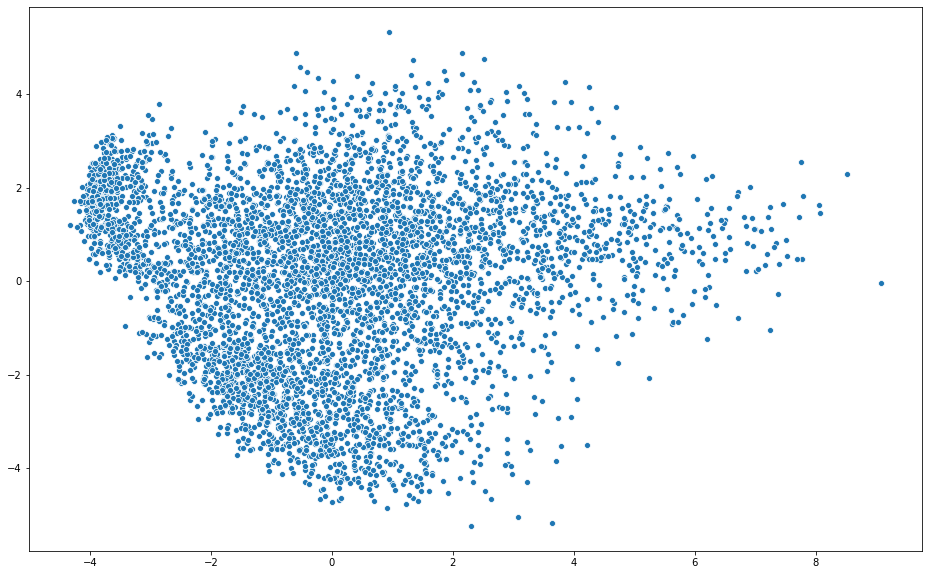

In [7]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=X_pca_reduced[:, 0], y= X_pca_reduced[:, 1],
    #hue=y,
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=1.0
)
plt.show()


## Why does PCA fail to create meaningful visualization on the MNIST dataset?

Because features of the MNIST dataset is non-linear!

Note that PCA is a **linear** dimensionality reduction technique that seeks to maximize variance and **preserves large pairwise distances**. In other words, things that are different end up far apart. This can lead to poor visualization especially when dealing with non-linear manifold structures, We describe manifold in a bit but for now consider manifolds as cylinder, ball, curve, etc.

Consider the swiss roll toy dataset as an example of a 2D manifold (bottom, left figure). A 2D plane strip is twisted to form a 3D shape. Although the structure is 3D, the data live in 2D.

Now consider two points a and b on the 2D manifold (left figure). These two points are **dissimilar**. Their dissimilarity is illustrated by the bold green line. 

However, their Euclidean distance (dotted marron line) suggests that they are **similar**. But in the context of the structure of the entire manifold they are very far. On a non-linear manifold the Euclidean distance between two points does not reflect their similarity very well.  

When we project the 3D swiss roll data in 2D, we expect that the Euclidean distance between points a and b would be large.

However, after PCA projects this dataset in 2D, we notice that a and b are closer, thus similar (right figure). Because their Euclidean distance is shorter (the dotted maroon line).

This problem happens because PCA tries to preserve large pair-wise distances in 3D after projecting into 2D. Note that the Euclidean distance is not reliable in a non-linear manifold.

PCA tries to maximize the variance which is equivalent to minimizing squared error between Euclidean distances in the original dataset and Euclidean distances in the map. Since it tries to minimize squared error, it concerns more with the preservation of large distances.

So, if points are dissimilar (i.e., their Euclidean distance is larger on the manifold), they end up far apart (e.g., in the MNIST dataset “0” and “1” are dissimilar and they end up being far apart.).

But if their Euclidean distance is smaller on the manifold (e.g., Euclidean distance between a and b on the manifold, left figure), PCA would preserve that in 2D. This is contrary to our expectation.

In 2D we are not interested preserving the Euclidean distance between a and b (dotted maroon line). We want them to be far apart in 2D as they were dissimilar in the manifold.


<img src="https://cse.unl.edu/~hasan/Pics/PCA-Limitation.png" width=800 height=400>


## When is Euclidean distance relieable on a Manifold?

Although the Euclidean distance between a and b (dotted maroon line) is not a relieable measure of their dissimilarity, we could use very-small Euclidean distances to be a relieable measure of similarity.

Thus, the very-small Euclidean distance between a point and its nearby neighbors is relaiable even in the non-linear manifold.

We need new techniques for dimensionality reduction on non-linear manifolds that preserve Euclidean distance between points if it is very small. In other words, these techniques should preserve the local structure of the data.


PCA doesn’t work well for visualization because it preserves large pair-wise distances, which is not reliable. Thus, for high-dimensional data that lies on or near a low-dimensional, non-linear manifold it is usually more important to keep the low-dimensional representations of very similar datapoints close together, which is typically not possible with a linear mapping.


One approach to resolve this issue is to use a **non-linear dimensionality reduction technique**. This technique is known as **Manifold Learning**.

In Manifold Learning we assume that the data of interest **lie on an embedded non-linear manifold within the higher-dimensional space**. More generally, a d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally resembles a d-dimensional hyperplane.



## What is a Manifold?

A manifold is a topological space that "locally" resembles Euclidean space. An intuitive (but not exactly correct) way to think about it is taking a geometric object from $R^d$ and trying to "fit" it into $R^n$, $n > d$. 

A simple example of a manifold is a line segment, which is 1D.

One way to embed a line in a 2D space is to "wrap" it around into a circle, shown in the following figure. Each arc of the circle locally looks closer to a line segment, and if we take an infinitesimal arc, it will "locally" resemble a 1D line segment.

<img src="https://cse.unl.edu/~hasan/Pics/Manifold-1D-LineSegment.png" width=300, height=100>

Another example is a sheet of paper. It is a 2D manifold embedded in 3D space. It's a 2D object that lives in our familiar 3D world, and can be bent or rolled in that two dimensions.

If we bend, curl, or crumple the paper, it is still a 2D manifold, but the embedding into the 3D space is **no longer linear**. 

Manifold learning algorithms intends to **learn about the fundamental 2D nature of the paper**, even as it is contorted to fill the 3D space.

https://www.youtube.com/playlist?list=PLRlVmXqzHjUQHEx63ZFxV-0Ortgf-rpJo


## Manifold Learning


Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie. This is called Manifold Learning. It is a class of unsupervised estimators that **seeks to describe datasets as low-dimensional manifolds embedded in high-dimensional spaces**. 

It relies on the manifold assumption, also called the manifold hypothesis, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. This assumption is very often empirically observed.

## Why are we interested about the Manifold Learning Technique?

If the manifold is of **low enough dimension**, the data can be visualized in the low-dimensional space.

We are interested about the Manifold Learning technique for the purpose of visualizing non-linear data in low dimension.

## Manifold Learning Algorithms

There are many algorithms for implementing Manifold Learning.

In this noebook we will explore following algorithms.

- Locally Linear Embedding (LLE)
- Isometric feature mapping (Isomap)
- Multi-dimensional Scaling (MDS)
- t-distributed Stochastic Neighbor Embedding (t-SNE)

For informaion on other algorithms and their scikit-learn implementation:
https://scikit-learn.org/stable/modules/manifold.html


# Locally Linear Embedding (LLE) 

LLE seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods. It can be thought of as a series of local Principal Component Analyses which are globally compared to find the best non-linear embedding.

It is a Manifold Learning technique that **does not rely on projections**. LLE works by first measuring how each training instance linearly relates to its closest neighbors, and then looking for a low-dimensional representation of the training set where these local relationships are best preserved. 

This makes it particularly good at unrolling twisted manifolds, especially when there is not too much noise.


## Synthetic Dataset


Generate a swiss roll dataset.

We use Scikit-Learn's "datasets.make_swiss_roll" function to generate a synthetic non-linear swiss roll dataset that is suitable for investigating non-linear dimensionality reduction.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html

The following two parameters are used by the make_swiss_roll function:

- n_samples : The number of sample points on the S curve.

- noise : Standard deviation of Gaussian noise added to the data.

## Load the Data and Visualize It

In [8]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

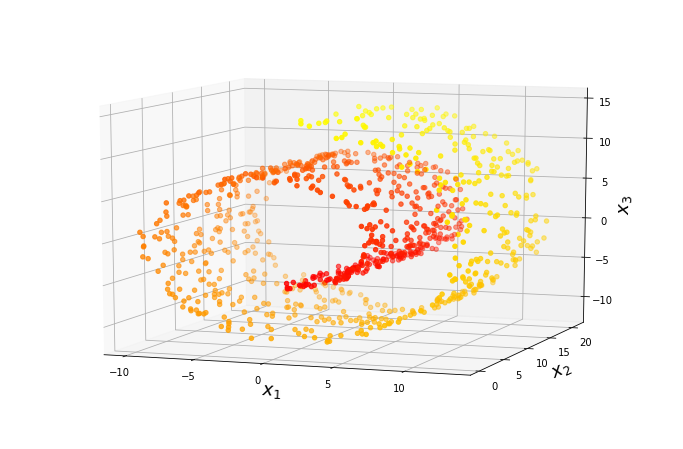

In [9]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, s=20, cmap=plt.cm.hot)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, s=20,cmap=plt.cm.autumn)
#ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, s=20, cmap=plt.cm.Spectral)

ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)

plt.show()

## Interactive 3D Plot

We create an interactive 3D representation by using **Plotly Express**. It is a high-level Python visualization library and a a wrapper for Plotly.py.

https://plot.ly/

We need to install plotly first.

        pip install plotly==4.2.1
        
We use **go.Scatter3D** from plotly.graph_objs. Like the 2D scatter plot go.Scatter, go.Scatter3d plots individual data in three-dimensional space.


In [10]:
fig = go.Figure(data=[go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=t,                # set color to an array/list of desired values
        #colorscale='Viridis',       # choose a colorscale
        #colorscale='spectral',
        colorscale='hot',
        opacity=0.9
    )
)])


fig.update_layout(scene = dict(
                    xaxis_title='x1',
                    yaxis_title='x2',
                    zaxis_title='x3'),
                    width=700,
                    margin=dict(r=0, b=0, l=0, t=0))
fig.show()


## Dimensionality Reduction: Locally Linear Embedding (LLE) 

In [11]:
%%time

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

CPU times: user 206 ms, sys: 11.5 ms, total: 217 ms
Wall time: 193 ms


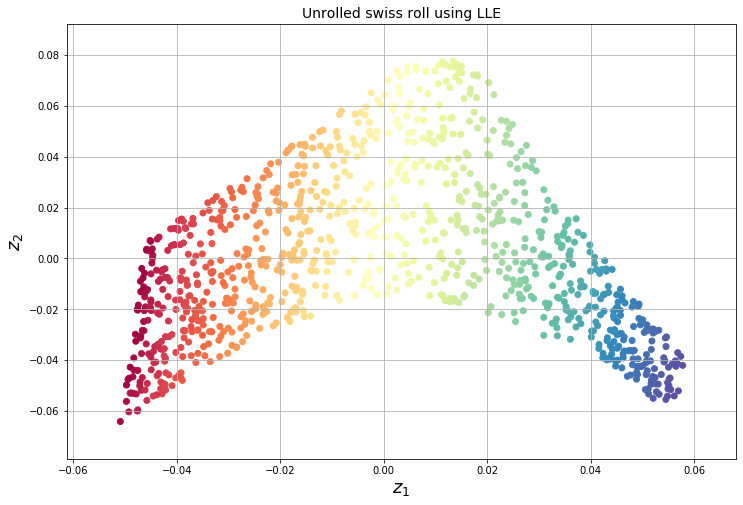

In [12]:
fig = plt.figure(figsize=(12, 8))
plt.title("Unrolled swiss roll using LLE", fontsize=14)
#plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.Spectral)

plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.grid(True)

plt.show()

## Observation: Locally Linear Embedding (LLE)

We observe that the Swiss roll is completely unrolled and the **distances between instances are locally well preserved**. 

However, distances are not preserved on a larger scale: 
        
        the right part of the unrolled Swiss roll is squeezed, while the left part is stretched. Nevertheless, LLE did a pretty good job at modeling the manifold.

## Comparison: LLE vs PCA

Let's compare LLE with PCA to see how these two algorithms differ in terms of visualizing the swiss roll data in 2D.

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

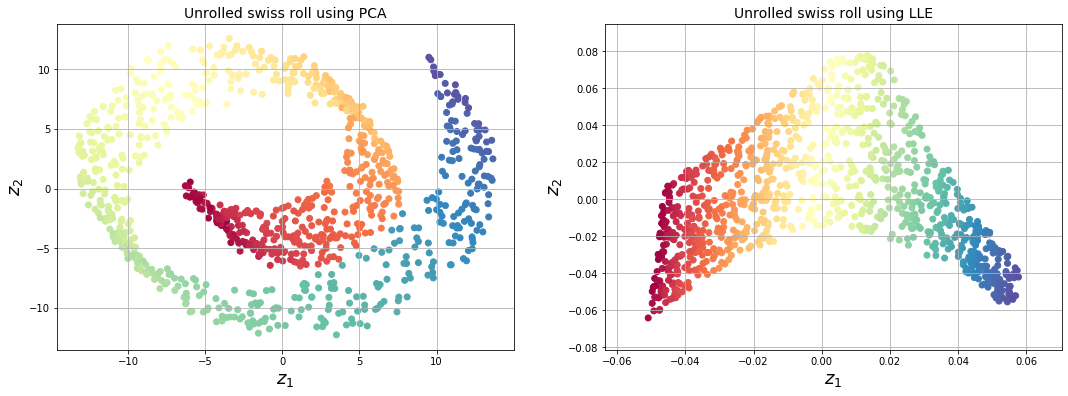

In [14]:
fig = plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.title("Unrolled swiss roll using PCA", fontsize=14)
#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=t, cmap=plt.cm.hot)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=t, cmap=plt.cm.Spectral)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.grid(True)


plt.subplot(122)
plt.title("Unrolled swiss roll using LLE", fontsize=14)
#plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.Spectral)

plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.grid(True)

plt.show()

## Observation: LLE vs PCA

We observe that PCA is unable to unroll the data.

# Comparison: LLE, MDS, Isomap, t-SNE

Let's see how the other three Manifold Learning techniques perform on the swiss roll dataset.



### Multidimensional scaling (MDS): 
MDS is a method for placing data points in a low-dimensional space (e.g., 2D) such that the Euclidean distance between them is as close as possible to their distances in the original space (i.e., high-dimension). 

For example, consider the following map of Europe drawn by MDS. The input to MDS is the pairwise road travel distances between the cities in Europe, Then, MDS places them in two dimensions such that these distances are preserved as well as possible.

<img src="https://cse.unl.edu/~hasan/Pics/MDS.png" width=600, height=300>

In general, MDS is a technique used for **analyzing similarity or dissimilarity data**. 

MDS attempts to model similarity or dissimilarity data as distances in a geometric spaces. The data can be ratings of similarity between objects, interaction frequencies of molecules, or trade indices between countries.

There exists two types of MDS algorithm: metric and non metric. In the scikit-learn, the class MDS implements both.


### Isometric Mapping (Isomap):
Isomap can be viewed as an extension of Multi-dimensional Scaling (MDS) or Kernel PCA. It is one of the earliest approaches to manifold learning.

Isomap seeks a lower-dimensional embedding which maintains geodesic distances between all points. It creates a graph by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to preserve the **geodesic distances** between the instances.

<img src="https://cse.unl.edu/~hasan/Pics/GeodesicDistance.png" width=400, height=200>

A geodesic distance is the shortest path between two points on a curved surface. Unlike the Euclidean distance that completely ignores the shape when finding a path from the start point to the end point, in the geodesic distance the path is constrained to be within the given shape.



### t-Distributed Stochastic Neighbor Embedding (t-SNE)

The t-SNE reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. 

While Isomap, LLE and variants are best suited to unfold a single continuous low dimensional manifold, t-SNE focuses on the local structure of the data and **tends to extract clustered local groups of samples**. This ability to group samples based on the local structure might be beneficial to **visually disentangle** a dataset that comprises several manifolds at once as is the case in the MNIST digits dataset.

The t-SNE is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space (e.g., to visualize the MNIST images in 2D).

## Train MDS, Isomap and t-SNE

In [15]:
mds = MDS(n_components=2, random_state=42)
%time X_reduced_mds = mds.fit_transform(X)

isomap = Isomap(n_components=2)
%time X_reduced_isomap = isomap.fit_transform(X)

tsne = TSNE(n_components=2, random_state=42)
%time X_reduced_tsne = tsne.fit_transform(X)

CPU times: user 1min, sys: 5.69 s, total: 1min 6s
Wall time: 17.1 s
CPU times: user 916 ms, sys: 42.9 ms, total: 959 ms
Wall time: 343 ms
CPU times: user 7.22 s, sys: 377 ms, total: 7.6 s
Wall time: 6.32 s


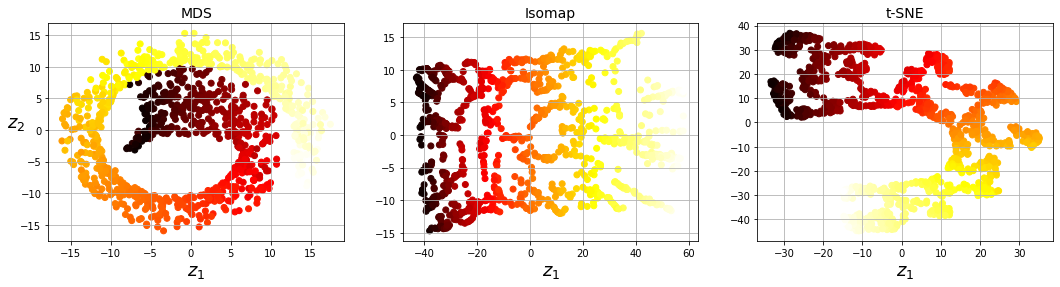

In [ ]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(18,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
    
plt.show()


plt.title("LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
#plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.Spectral)

plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.grid(True)
plt.show()

## Observation

We observe that Isomap and t-SNE, as well as LLE, are able to unroll the data.

We will see in the next notebook the t-SNE is so far the **best Manifold Learning algorithm for visualizing high-dimensional non-linear data**.